## Import Data CSV as a Pandas DataFrame

In [1]:
import pandas as pd
import os

clean_data = pd.read_csv(os.path.join('..','data', 'vets_by_state_clean.csv'))

There are 50 states, so there should be 50 rows.  We can check through the `shape` method for a DataFrame.

In [11]:
clean_data.shape

(52, 21)

It turns out Puerto Rico and District of Columbia are included in this dataset.

Select a smaller subset of data and rename the column names to something more managable.

In [3]:
subset = clean_data.loc[:, ['STATE',
                            'Bachelor Degree or Higher*',
                            'Below Poverty Level-Past 12 Months Income',
                            'Disability Rate- with Any Disability']]
subset.rename(
    columns = {'STATE':'Name', # Puerto Rico and DC are here
               "Bachelor Degree or Higher*":"Bachelor's\nAttainment",
               "Below Poverty Level-Past 12 Months Income":"Below Poverty Level\nIncome",
               "Disability Rate- with Any Disability":"Disability\nRate"},
    inplace = True)

subset.head()

,Name,Bachelor's Attainment,Below Poverty Level Income,Disability Rate
0,Alabama,53.5,14.0,67.0
1,Alaska,58.3,9.3,46.8
2,Arizona,57.1,15.0,61.2
3,Arkansas,42.7,19.7,67.8
4,California,60.1,14.9,60.7


We can add a new column `Status` which looks at whether or not the row belongs to a state or a non-state (territory or district).

In [12]:
not_states = ['Puerto Rico', 'District Of Columbia']
states = sorted(list( set(subset['Name']) - set(not_states)))

subset['Status'] = subset['Name'].isin(states)
subset['Status'].replace(to_replace = [True, False],
                         value = ['state', 'not state'],
                        inplace = True)
subset.head()

,Name,Bachelor's Attainment,Below Poverty Level Income,Disability Rate,Status
0,Alabama,53.5,14.0,67.0,state
1,Alaska,58.3,9.3,46.8,state
2,Arizona,57.1,15.0,61.2,state
3,Arkansas,42.7,19.7,67.8,state
4,California,60.1,14.9,60.7,state


I expect less veterans in Puerto Rico and Washington DC which could mean their variables differ dramatically from the 50 States.

To show this, we can create a scatter matrix while color-coding for state vs non-state.

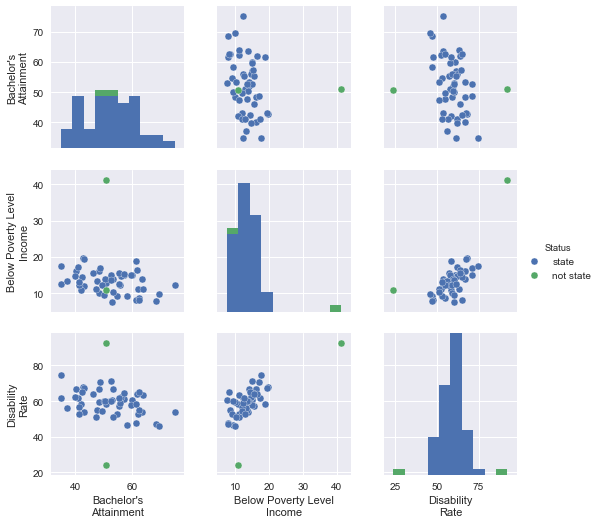

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

_ = sns.pairplot(subset, hue = 'Status')

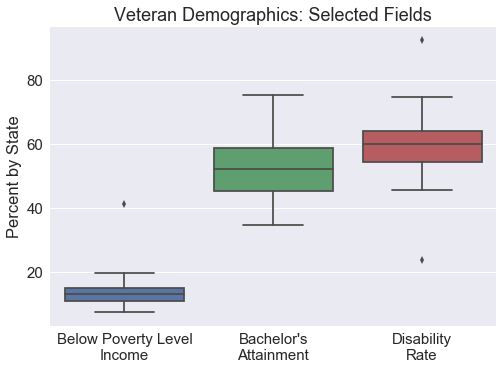

In [6]:
with sns.plotting_context("notebook", font_scale=1.5):
    #fig, ax = plt.subplots()
    #fig.set_size_inches([7, 5])
    ax = sns.boxplot(data = subset,
                     order = ["Below Poverty Level\nIncome",
                              "Bachelor's\nAttainment",
                              "Disability\nRate",],
               )
    ax.set_ylabel("Percent by State")
    ax.set_title("Veteran Demographics: Selected Fields")
    
    #plt.savefig(os.path.expanduser('~/vet_demographics_box.png'), dpi=200)